In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
import seaborn as sns
%matplotlib inline

In [55]:
pwd

'/home/saiful/Desktop/Machine_learning/Machine_Learning_AZ_Template_Folder/Part 3 - Classification/Section 14 - Logistic Regression'

In [56]:
dataset=pd.read_csv('titanic_train.csv')



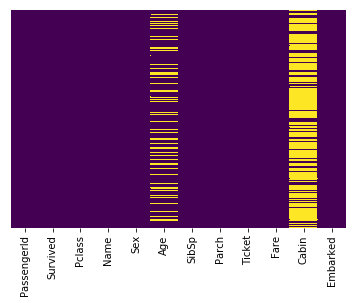

In [62]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
sns.set_style('whitegrid')

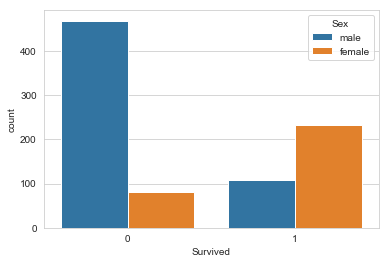

In [68]:
sns.countplot(x='Survived', data=dataset,hue='Sex')

In [70]:
def impute_age(cols):
    Age=cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [72]:
dataset['Age'] =dataset[['Age','Pclass']].apply(impute_age,axis=1)

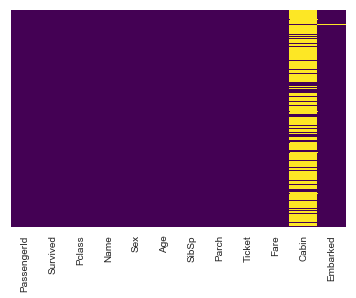

In [74]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:
dataset.drop('Cabin',axis=1,inplace=True)

In [96]:
dataset.dropna(inplace=True)

In [97]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True)

In [98]:
embark=pd.get_dummies(dataset['Embarked'],drop_first=True)

In [99]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [100]:
dataset=pd.concat([dataset,sex,embark],axis=1)

In [102]:

dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [105]:
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [112]:
dataset.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [108]:
dataset.drop('PassengerId',axis=1,inplace=True)

In [133]:
#x=dataset.drop('Survived',axis=1)
#y=dataset['Survived']
X=dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y=dataset['Survived']

In [128]:
dataset.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [136]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)


In [120]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [121]:
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [123]:
from sklearn.linear_model import LogisticRegression


In [131]:
logmodel=LogisticRegression()

In [137]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.775,0,0,1
651,2,18.0,0,1,23.000,0,0,1
2,3,26.0,0,0,7.925,0,0,1
690,1,31.0,1,0,57.000,1,0,1
196,3,24.0,0,0,7.750,1,1,0


In [140]:
predictions=logmodel.predict(x_test)

In [141]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

